In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.formula.api import ols
from statsmodels.api import qqplot, add_constant
import statsmodels.formula.api as smf
from statsmodels.tools.eval_measures import rmse
%matplotlib inline

In [2]:
df_raw = pd.read_csv("부품수리시간.csv")
df_raw.head()

,UNITS,MINUTES
0,1,23
1,2,29
2,3,49
3,4,64
4,4,74


In [3]:
df_raw.describe().round(3)

,UNITS,MINUTES
count,14.000,14.000
mean,6.000,97.214
std,2.961,46.217
min,1.000,23.000
25%,4.000,66.500
50%,6.000,96.500
75%,8.750,138.500
max,10.000,166.000


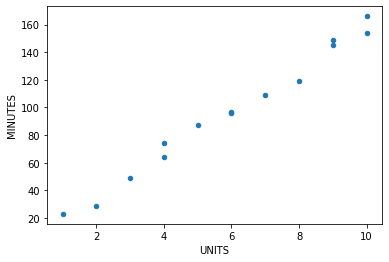

In [4]:
df_raw.plot.scatter( x = "UNITS", y = "MINUTES")

In [5]:
df_raw.corr(method = "pearson").round(3)

,UNITS,MINUTES
UNITS,1.000,0.994
MINUTES,0.994,1.000


In [6]:
reg_model = smf.ols(formula = "MINUTES ~ UNITS", data = df_raw)
reg_result = reg_model.fit()
print(reg_result.summary())

                            OLS Regression Results                            
Dep. Variable:                MINUTES   R-squared:                       0.987
Model:                            OLS   Adj. R-squared:                  0.986
Method:                 Least Squares   F-statistic:                     943.2
Date:                Mon, 07 Sep 2020   Prob (F-statistic):           8.92e-13
Time:                        19:42:16   Log-Likelihood:                -42.374
No. Observations:                  14   AIC:                             88.75
Df Residuals:                      12   BIC:                             90.03
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.1617      3.355      1.240      0.2

C:\Users\cptas\anaconda3\lib\site-packages\scipy\stats\stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=14
  "anyway, n=%i" % int(n))


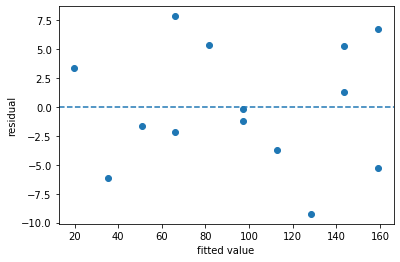

In [7]:
plt.scatter(reg_result.fittedvalues, reg_result.resid)
plt.xlabel("fitted value"); plt.ylabel("residual")
plt.axhline(y = 0, linestyle = "--")

C:\Users\cptas\anaconda3\lib\site-packages\scipy\stats\stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=14
  "anyway, n=%i" % int(n))


NormaltestResult(statistic=0.7464482182734666, pvalue=0.6885109139659061)

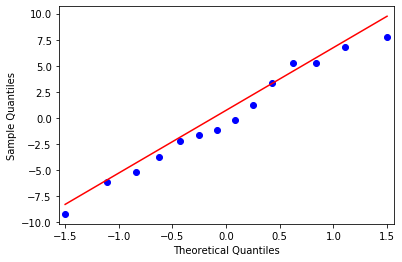

In [8]:
qqplot(reg_result.resid, line = "q")
from statsmodels.stats.stattools import omni_normtest
omni_normtest(reg_result.resid, axis = 0)

In [9]:
df_raw = pd.read_csv("체질검사.csv")
df_raw.head()

,FAT,AGE,WEIGHT,HEIGHT,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST
0,35.2,46,363.15,72.25,51.2,136.2,148.1,147.7,87.3,49.1,29.6,45.0,29.0,21.4
1,11.8,27,168.00,71.25,38.1,93.0,79.1,94.5,57.3,36.2,24.5,29.0,30.0,18.8
2,22.2,69,177.75,68.50,38.7,102.0,95.0,98.3,55.0,38.3,21.8,30.8,25.7,18.8
3,10.6,57,147.75,65.75,35.2,99.6,86.4,90.1,53.0,35.0,21.3,31.7,27.3,16.9
4,47.5,51,219.00,64.00,41.2,119.8,122.1,112.8,62.5,36.9,23.6,34.7,29.1,18.4


In [10]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler

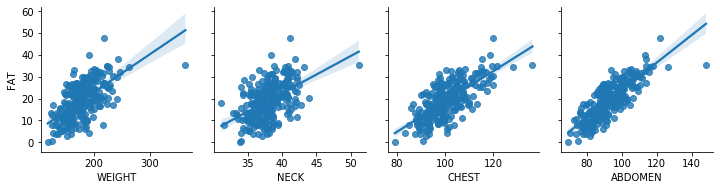

In [11]:
sns.pairplot(df_raw, y_vars = "FAT", x_vars = ["WEIGHT", "NECK", "CHEST", "ABDOMEN"], kind = "reg")

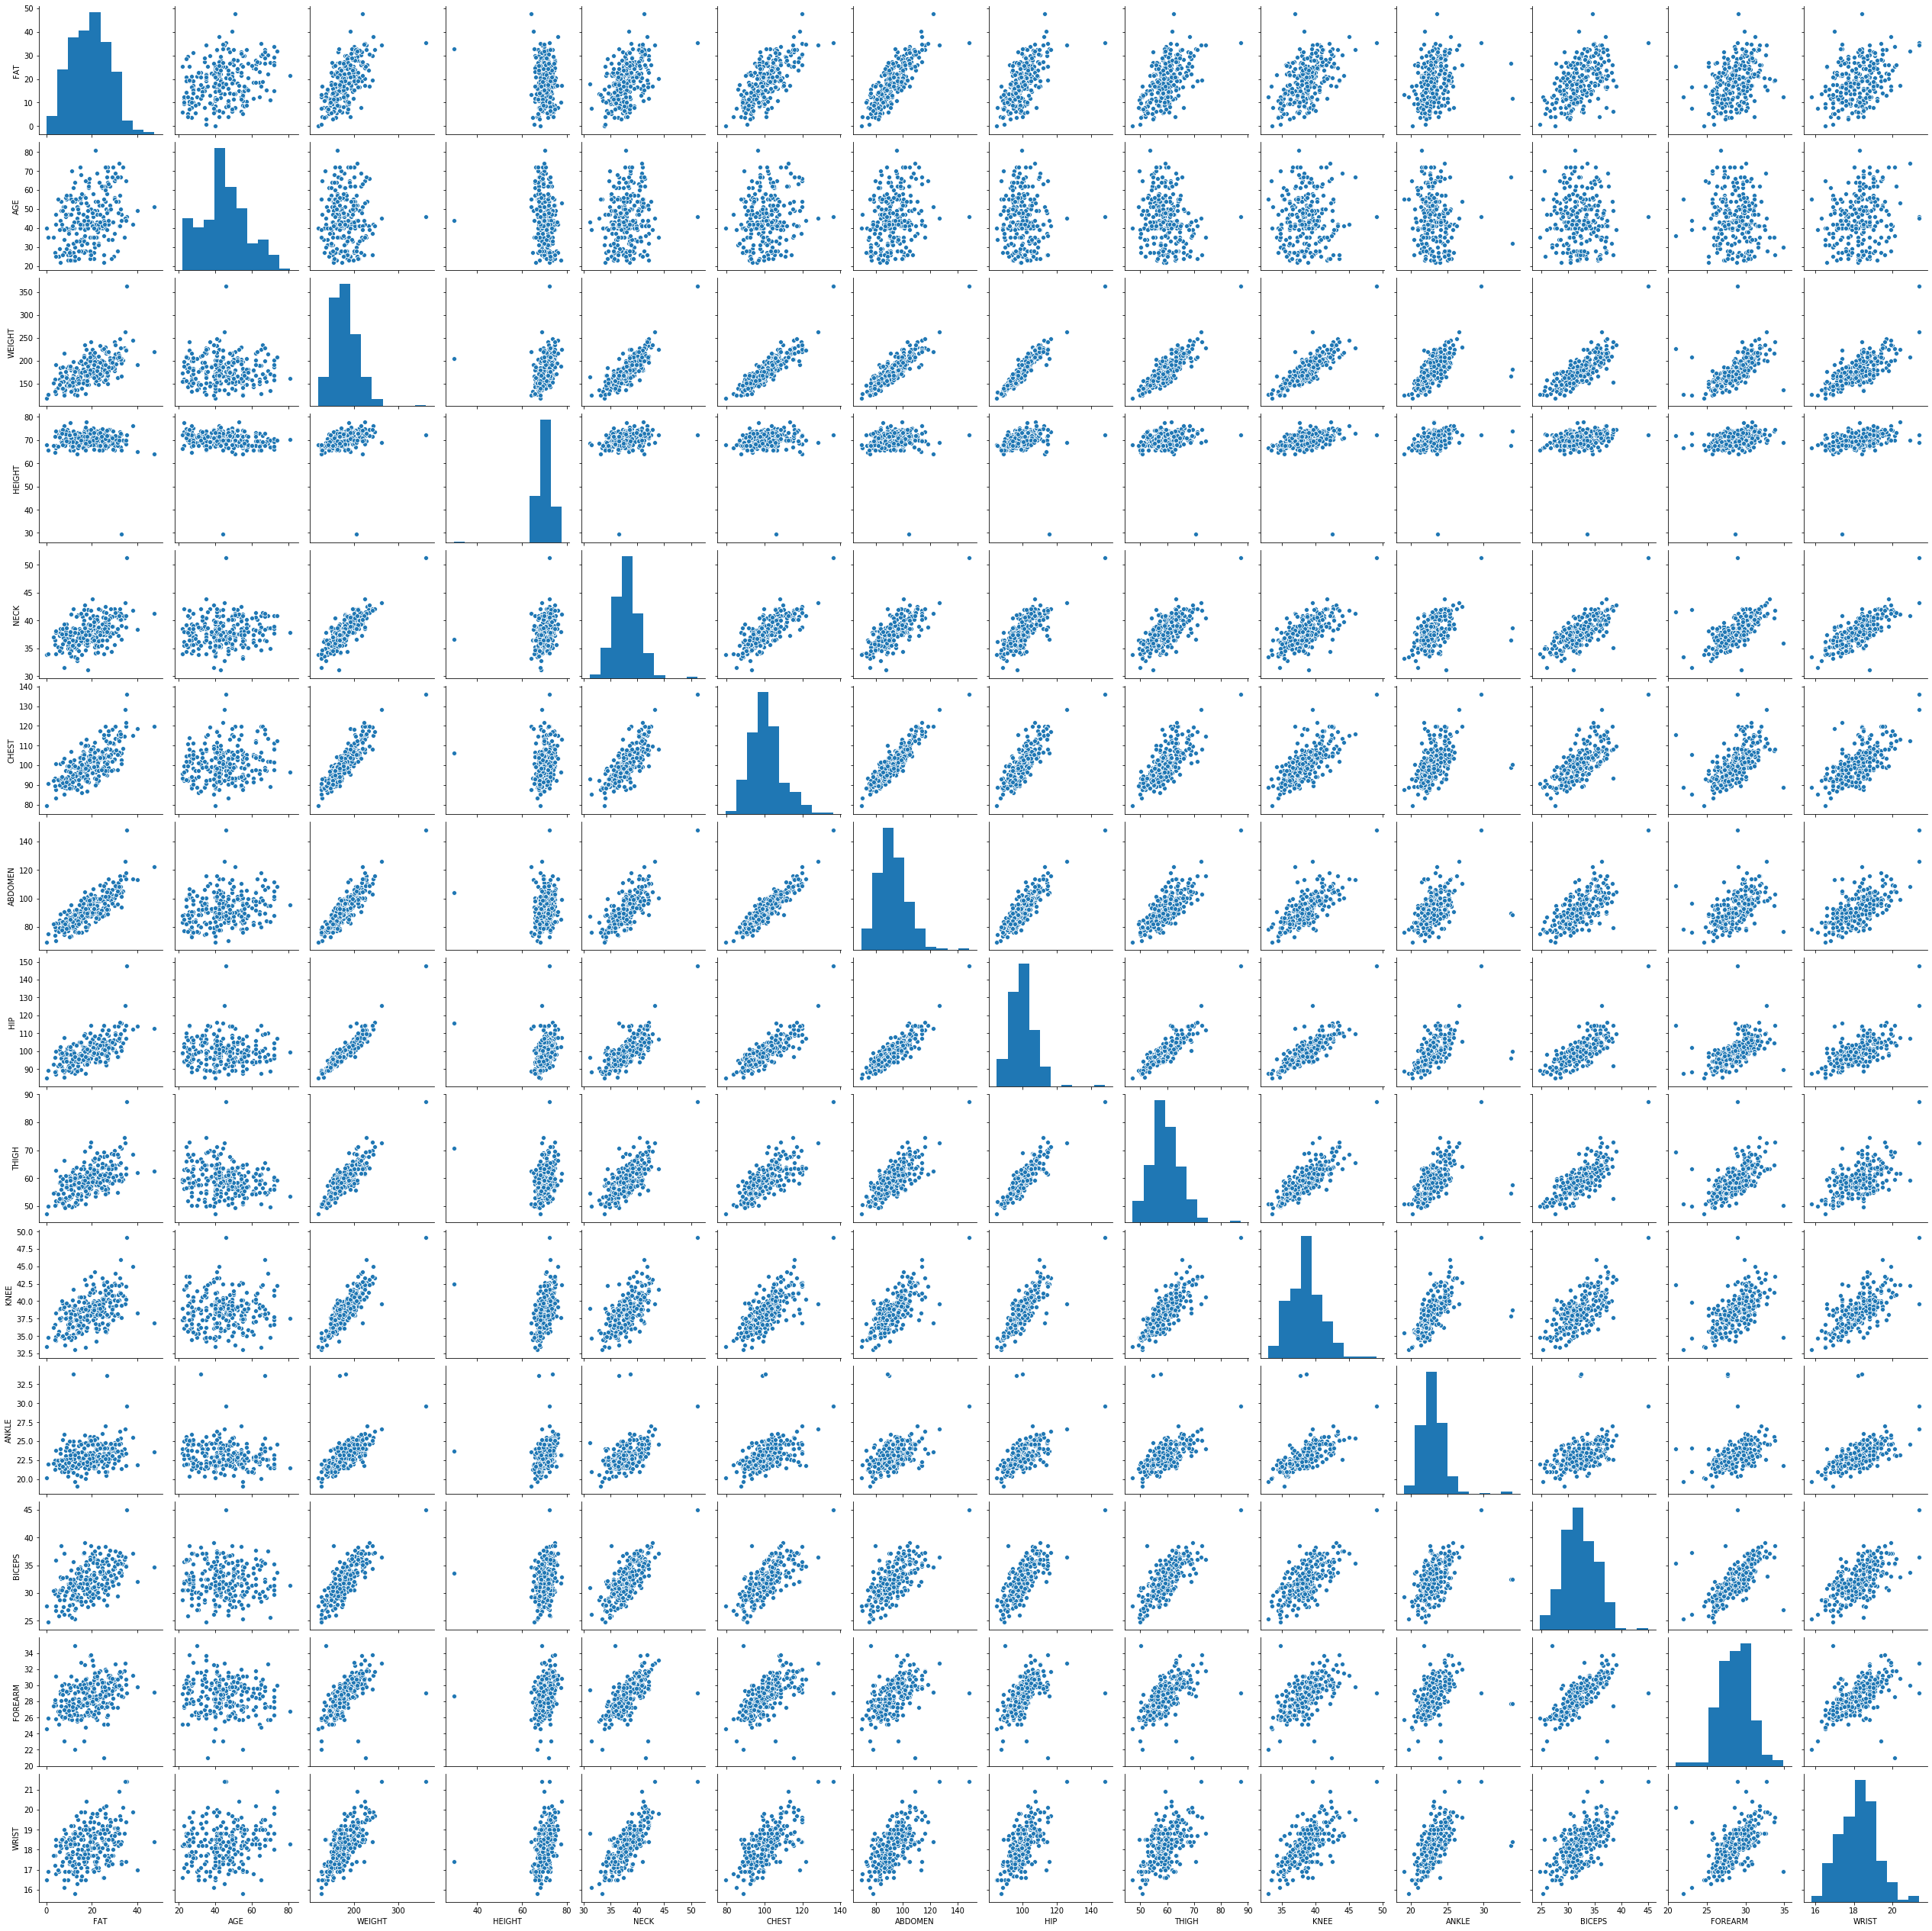

In [12]:
sns.pairplot(df_raw)

In [13]:
df_raw.corr().round(3)

,FAT,AGE,WEIGHT,HEIGHT,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST
FAT,1.000,0.291,0.612,-0.089,0.491,0.703,0.813,0.625,0.560,0.509,0.266,0.493,0.361,0.347
AGE,0.291,1.000,-0.013,-0.172,0.114,0.176,0.230,-0.050,-0.200,0.018,-0.105,-0.041,-0.085,0.214
WEIGHT,0.612,-0.013,1.000,0.308,0.831,0.894,0.888,0.941,0.869,0.853,0.614,0.800,0.630,0.730
HEIGHT,-0.089,-0.172,0.308,1.000,0.254,0.135,0.088,0.170,0.148,0.286,0.265,0.208,0.229,0.322
NECK,0.491,0.114,0.831,0.254,1.000,0.785,0.754,0.735,0.696,0.672,0.478,0.731,0.624,0.745
CHEST,0.703,0.176,0.894,0.135,0.785,1.000,0.916,0.829,0.730,0.719,0.483,0.728,0.580,0.660
ABDOMEN,0.813,0.230,0.888,0.088,0.754,0.916,1.000,0.874,0.767,0.737,0.453,0.685,0.503,0.620
HIP,0.625,-0.050,0.941,0.170,0.735,0.829,0.874,1.000,0.896,0.823,0.558,0.739,0.545,0.630
THIGH,0.560,-0.200,0.869,0.148,0.696,0.730,0.767,0.896,1.000,0.799,0.540,0.761,0.567,0.559
KNEE,0.509,0.018,0.853,0.286,0.672,0.719,0.737,0.823,0.799,1.000,0.612,0.679,0.556,0.665


In [14]:
reg_model = smf.ols(formula = "FAT ~ AGE + WEIGHT + HEIGHT + NECK + CHEST + ABDOMEN + HIP + THIGH + KNEE + ANKLE + BICEPS + FOREARM + WRIST", data = df_raw)
reg_result = reg_model.fit()
print(reg_result.summary())

                            OLS Regression Results                            
Dep. Variable:                    FAT   R-squared:                       0.749
Model:                            OLS   Adj. R-squared:                  0.735
Method:                 Least Squares   F-statistic:                     54.65
Date:                Mon, 07 Sep 2020   Prob (F-statistic):           7.72e-64
Time:                        21:07:32   Log-Likelihood:                -718.25
No. Observations:                 252   AIC:                             1465.
Df Residuals:                     238   BIC:                             1514.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -18.1885     17.349     -1.048      0.2

In [15]:
df_raw_x = df_raw.drop("FAT", axis =1)
df_raw_x_const = add_constant(df_raw_x)
df_vif = pd.DataFrame()
df_vif['variable'] = df_raw_x_const.columns
df_vif["VIF"] = [variance_inflation_factor(df_raw_x_const.values, i)for i in range(df_raw_x_const.shape[1])]
df_vif.sort_values("VIF", inplace = True)
df_vif.round(3)

,variable,VIF
3,HEIGHT,1.675
10,ANKLE,1.908
12,FOREARM,2.192
1,AGE,2.250
13,WRIST,3.378
11,BICEPS,3.620
4,NECK,4.324
9,KNEE,4.612
8,THIGH,7.778
5,CHEST,9.461


In [16]:
df_raw_x = df_raw.drop(["FAT", "WEIGHT"], axis =1)
df_raw_x_const = add_constant(df_raw_x)
df_vif = pd.DataFrame()
df_vif['variable'] = df_raw_x_const.columns
df_vif["VIF"] = [variance_inflation_factor(df_raw_x_const.values, i)for i in range(df_raw_x_const.shape[1])]
df_vif.sort_values("VIF", inplace = True)
df_vif.round(3)

,variable,VIF
2,HEIGHT,1.330
9,ANKLE,1.844
1,AGE,2.154
11,FOREARM,2.192
12,WRIST,3.309
10,BICEPS,3.507
3,NECK,3.956
8,KNEE,4.312
7,THIGH,7.753
4,CHEST,7.883


In [17]:
reg_model = smf.ols(formula = "FAT ~ AGE + HEIGHT + NECK + CHEST + ABDOMEN + HIP + THIGH + KNEE + ANKLE + BICEPS + FOREARM + WRIST", data = df_raw)
reg_result = reg_model.fit()
print(reg_result.summary())

                            OLS Regression Results                            
Dep. Variable:                    FAT   R-squared:                       0.746
Model:                            OLS   Adj. R-squared:                  0.733
Method:                 Least Squares   F-statistic:                     58.55
Date:                Mon, 07 Sep 2020   Prob (F-statistic):           3.75e-64
Time:                        21:11:53   Log-Likelihood:                -719.69
No. Observations:                 252   AIC:                             1465.
Df Residuals:                     239   BIC:                             1511.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.5453      7.672      0.984      0.3

In [18]:
df_raw_y = df_raw["FAT"]
model = LinearRegression()
rfe = RFE(estimator = model, n_features_to_select = 5).fit(df_raw_x, df_raw_y)
selected_cols = df_raw_x.columns[rfe.support_]
removed_cols = df_raw_x.columns[~rfe.support_]

print("Selected Variables: {}".format(selected_cols))
print("Removed Variables: {}".format(removed_cols))

Selected Variables: Index(['NECK', 'ABDOMEN', 'HIP', 'FOREARM', 'WRIST'], dtype='object')
Removed Variables: Index(['AGE', 'HEIGHT', 'CHEST', 'THIGH', 'KNEE', 'ANKLE', 'BICEPS'], dtype='object')


In [20]:
rfe_reg_model = smf.ols(formula = "FAT ~ NECK + ABDOMEN + HIP + FOREARM + WRIST", data = df_raw)
rfe_reg_result = rfe_reg_model.fit()
print(rfe_reg_result.summary())

                            OLS Regression Results                            
Dep. Variable:                    FAT   R-squared:                       0.731
Model:                            OLS   Adj. R-squared:                  0.726
Method:                 Least Squares   F-statistic:                     133.8
Date:                Mon, 07 Sep 2020   Prob (F-statistic):           4.38e-68
Time:                        21:18:32   Log-Likelihood:                -726.92
No. Observations:                 252   AIC:                             1466.
Df Residuals:                     246   BIC:                             1487.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.7037      6.231      0.434      0.6

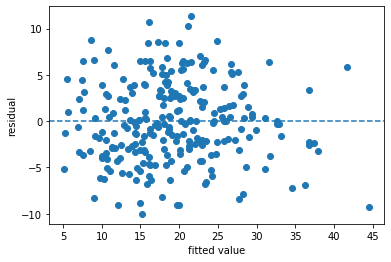

In [21]:
# 잔차 산점도: X-예측값, Y-잔차)
plt.scatter(rfe_reg_result.fittedvalues, rfe_reg_result.resid)
plt.xlabel("fitted value")
plt.ylabel("residual")
plt.axhline(y = 0, linestyle = "--")


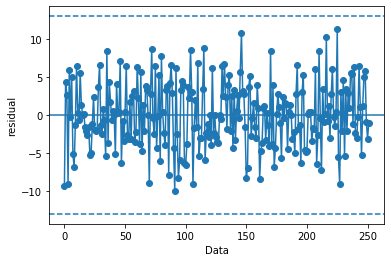

In [22]:
# 잔차의 독립성 확인
plt.plot(df_raw.index, rfe_reg_result.resid, marker="o")
plt.xlabel("Data")
plt.ylabel("residual")
plt.axhline(y = 0, linestyle = "-")
plt.axhline(y = 3*np.std(rfe_reg_result.resid), linestyle = "--")
plt.axhline(y = -3*np.std(rfe_reg_result.resid), linestyle = "--")



NormaltestResult(statistic=3.6952734095022093, pvalue=0.15760920360555114)

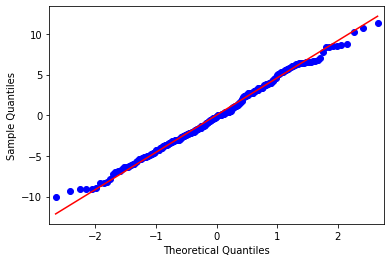

In [23]:
# 잔차 정규성 검정:Q-Q plot. s-standardized line (교재에는 없음)
qqplot(rfe_reg_result.resid, line = "q")
from statsmodels.stats.stattools import omni_normtest
omni_normtest(rfe_reg_result.resid, axis=0)


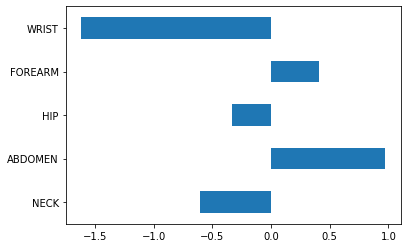

In [24]:
df_reg_coef = pd.DataFrame({"Coef": rfe_reg_result.params.values[1:]}, index = selected_cols)
df_reg_coef.plot.barh(y= "Coef", legend= False)

In [30]:
scaler = StandardScaler()
cols = df_raw_x.columns
np_scaled = scaler.fit_transform(df_raw_x)
df_scaled = pd.DataFrame(np_scaled, columns = cols)
df_scaled["FAT"] = df_raw["FAT"]
reg_model_scaled = smf.ols(formula = "FAT ~ NECK + ABDOMEN + HIP + FOREARM + WRIST", data = df_scaled)
reg_result_scaled = reg_model_scaled.fit()
print(reg_result_scaled.summary())

                            OLS Regression Results                            
Dep. Variable:                    FAT   R-squared:                       0.731
Model:                            OLS   Adj. R-squared:                  0.726
Method:                 Least Squares   F-statistic:                     133.8
Date:                Mon, 07 Sep 2020   Prob (F-statistic):           4.38e-68
Time:                        21:33:47   Log-Likelihood:                -726.92
No. Observations:                 252   AIC:                             1466.
Df Residuals:                     246   BIC:                             1487.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     19.1508      0.276     69.362      0.0

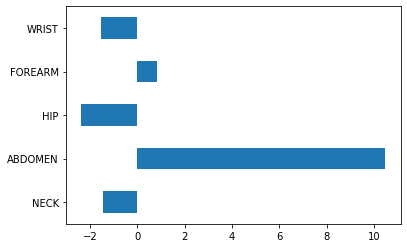

In [33]:
df_reg_coef = pd.DataFrame({"Coef": reg_result_scaled.params.values[1:]}, index = selected_cols)
df_reg_coef.plot.barh(y = "Coef", legend = False)

In [34]:
pip install GraphViz

In [37]:
from sklearn.tree import export_graphviz
import graphviz
import matplotlib
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
matplotlib.rc("font", family = "Malgun Gothic")

In [39]:
df = pd.read_csv("체질검사.csv")
df_y = df["FAT"]
df_x = df.drop("FAT", axis = 1, inplace = False)
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_x, df_y, test_size = 0.3, random_state = 1234)
print("train data x size: {}".format(df_train_x.shape))
print("train data y size: {}".format(df_train_y.shape))
print("test data x size: {}".format(df_test_x.shape))
print("test data y size: {}".format(df_test_y.shape))

train data x size: (176, 13)
train data y size: (176,)
test data x size: (76, 13)
test data y size: (76,)


In [41]:
tree_uncustomized = DecisionTreeRegressor(random_state = 1234)
tree_uncustomized.fit(df_train_x, df_train_y)
print("Scoring on training set: {:.3f}".format(tree_uncustomized.score(df_train_x, df_train_y)))
print("Scoring on test set: {:.3f}".format(tree_uncustomized.score(df_test_x, df_test_y)))

Scoring on training set: 1.000
Scoring on test set: 0.295


In [43]:
tree_uncustomized

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=1234, splitter='best')

In [47]:
train_score = []; test_score = []
para_leaf = [n_leaf*1for n_leaf in range(1, 20)]

for v_min_samples_leaf in para_leaf:
    tree = DecisionTreeRegressor(random_state = 1234,
                                min_samples_leaf = v_min_samples_leaf)
    tree.fit(df_train_x, df_train_y)
    train_score.append(tree.score(df_train_x, df_train_y))
    test_score.append(tree.score(df_test_x, df_test_y))

df_score_leaf = pd.DataFrame()
df_score_leaf["MinSampleLeaf"] = para_leaf
df_score_leaf['TrainScore'] = train_score
df_score_leaf["TestScore"] = test_score

In [48]:
df_score_leaf.round(3)

,MinSampleLeaf,TrainScore,TestScore
0,1,1.000,0.295
1,2,0.970,0.374
2,3,0.928,0.445
3,4,0.902,0.447
4,5,0.868,0.451
5,6,0.851,0.447
6,7,0.843,0.465
7,8,0.830,0.536
8,9,0.802,0.477
9,10,0.793,0.505


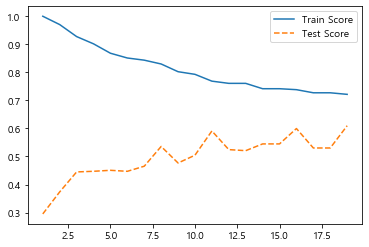

In [51]:
plt.plot(para_leaf, train_score, linestyle = "-", label = "Train Score")
plt.plot(para_leaf, test_score, linestyle = "--", label = "Test Score")
plt.legend()

In [52]:
v_feature_name = df_train_x.columns
tree_graph = DecisionTreeRegressor(random_state = 1234, min_samples_leaf = 8)
tree_graph.fit(df_train_x, df_train_y)
export_graphviz(tree_graph, out_file = "tree_leaf.dot",
               feature_names = v_feature_name, impurity = True, filled = True)
with open("tree_leaf.dot")as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

ExecutableNotFound: failed to execute ['dot', '-Tsvg'], make sure the Graphviz executables are on your systems' PATH

In [61]:
tree_graph = DecisionTreeRegressor(random_state = 1234, min_samples_leaf = 16)
tree_graph.fit(df_train_x, df_train_y)
export_graphviz(tree_graph, out_file = "tree_leaf.dot",
               feature_names = v_feature_name, impurity = True, filled = True)
with open("tree_leaf.dot")as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

ExecutableNotFound: failed to execute ['dot', '-Tsvg'], make sure the Graphviz executables are on your systems' PATH

In [55]:
train_score = []; test_score = []
para_split = [n_split*2for n_split in range(2, 20)]

for v_min_samples_split in para_split:
    tree = DecisionTreeRegressor(random_state = 1234,
                                min_samples_leaf = 8 ,
                                min_samples_split = v_min_samples_split)
    tree.fit(df_train_x, df_train_y)
    train_score.append(tree.score(df_train_x, df_train_y))
    test_score.append(tree.score(df_test_x, df_test_y))

df_score_split = pd.DataFrame()
df_score_split["MinSampleLeaf"] = para_split
df_score_split['TrainScore'] = train_score
df_score_split["TestScore"] = test_score
df_score_split.round(3)

,MinSampleLeaf,TrainScore,TestScore
0,4,0.830,0.536
1,6,0.830,0.536
2,8,0.830,0.536
3,10,0.830,0.536
4,12,0.830,0.536
5,14,0.830,0.536
6,16,0.830,0.536
7,18,0.821,0.557
8,20,0.813,0.581
9,22,0.792,0.567


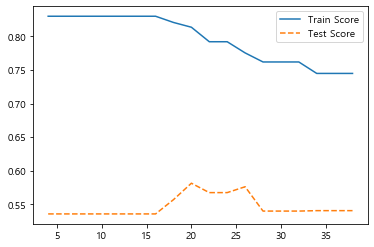

In [56]:
plt.plot(para_split, train_score, linestyle = "-", label = "Train Score")
plt.plot(para_split, test_score, linestyle = "--", label = "Test Score")
plt.legend()

In [57]:
tree_graph = DecisionTreeRegressor(random_state = 1234, min_samples_leaf = 8, min_samples_split = 20)
tree_graph.fit(df_train_x, df_train_y)
export_graphviz(tree_graph, out_file = "tree_leaf.dot",
               feature_names = v_feature_name, impurity = True, filled = True)
with open("tree_leaf.dot")as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

TypeError: __init__() got an unexpected keyword argument 'Random_state'

In [58]:
tree_graph = DecisionTreeRegressor(random_state = 1234, min_samples_leaf = 8, min_samples_split = 26)
tree_graph.fit(df_train_x, df_train_y)
export_graphviz(tree_graph, out_file = "tree_leaf.dot",
               feature_names = v_feature_name, impurity = True, filled = True)
with open("tree_leaf.dot")as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

TypeError: __init__() got an unexpected keyword argument 'Random_state'

In [59]:
train_score = []; test_score = []
para_depth = [depth for depth in range(2, 20)]

for v_max_depth in para_depth:
    tree = DecisionTreeRegressor(random_state = 1234,
                                min_samples_leaf = 8 ,
                                min_samples_split = 20,
                                max_depth = v_max_depth)
    tree.fit(df_train_x, df_train_y)
    train_score.append(tree.score(df_train_x, df_train_y))
    test_score.append(tree.score(df_test_x, df_test_y))

df_score_depth = pd.DataFrame()
df_score_depth["MinSampleLeaf"] = para_depth
df_score_depth['TrainScore'] = train_score
df_score_depth["TestScore"] = test_score
df_score_depth.round(3)

,MinSampleLeaf,TrainScore,TestScore
0,2,0.679,0.569
1,3,0.749,0.538
2,4,0.783,0.570
3,5,0.808,0.581
4,6,0.813,0.581
5,7,0.813,0.581
6,8,0.813,0.581
7,9,0.813,0.581
8,10,0.813,0.581
9,11,0.813,0.581


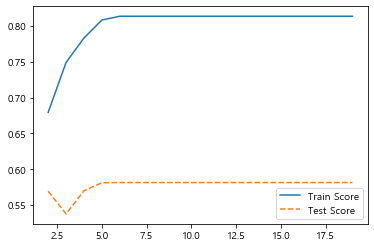

In [60]:
plt.plot(para_depth, train_score, linestyle = "-", label = "Train Score")
plt.plot(para_depth, test_score, linestyle = "--", label = "Test Score")
plt.legend()

In [ ]:
tree_graph = DecisionTreeRegressor(random_state = 1234, min_samples_leaf = 8, min_samples_split = 20, max_depth = 2)
tree_graph.fit(df_train_x, df_train_y)
export_graphviz(tree_graph, out_file = "tree_leaf.dot",
               feature_names = v_feature_name, impurity = True, filled = True)
with open("tree_leaf.dot")as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

In [ ]:
tree_graph = DecisionTreeRegressor(random_state = 1234, min_samples_leaf = 8, min_samples_split = 20, max_depth = 4)
tree_graph.fit(df_train_x, df_train_y)
export_graphviz(tree_graph, out_file = "tree_leaf.dot",
               feature_names = v_feature_name, impurity = True, filled = True)
with open("tree_leaf.dot")as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

In [63]:
tree_final = DecisionTreeRegressor(min_samples_leaf = 8, min_samples_split = 20, max_depth = 4, random_state = 1234,)
tree_final.fit(df_train_x, df_train_y)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=4,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=8, min_samples_split=20,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=1234, splitter='best')

In [ ]:
export_graphviz(tree_final, out_file = "tree_final.dot",
               feature_names = v_feature_name, impurity = True, filled = True)
with open("tree_leaf.dot")as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

In [64]:
df_importance = pd.DataFrame()
df_importance["Feature"] = v_feature_name
df_importance["Importance"] = tree_final.feature_importances_

df_importance.sort_values("Importance", ascending = False, inplace = True)
df_importance.round(3)

,Feature,Importance
5,ABDOMEN,0.895
7,THIGH,0.032
3,NECK,0.026
0,AGE,0.019
2,HEIGHT,0.017
9,ANKLE,0.011
1,WEIGHT,0.000
4,CHEST,0.000
6,HIP,0.000
8,KNEE,0.000


Text(0, 0.5, '변수')

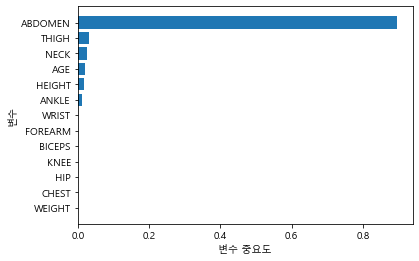

In [66]:
df_importance.sort_values("Importance", ascending = True, inplace = True)
coordinates = range(len(df_importance))
plt.barh(y = coordinates, width = df_importance["Importance"])
plt.yticks(coordinates, df_importance["Feature"])
plt.xlabel("변수 중요도")
plt.ylabel("변수")

In [70]:
estimator = DecisionTreeRegressor()
param_grid = {"criterion": ['mse', 'friedman_mse', 'mae'], "max_features": ["auto", "sqrt", 'log2'],
             "max_depth": para_depth, "min_samples_split": para_split, "min_samples_leaf": para_leaf}

grid_dt = GridSearchCV(estimator, param_grid, scoring = "r2", n_jobs = -1)
grid_dt.fit(df_train_x, df_train_y)

print("best estimator model: \n{}".format(grid_dt.best_estimator_))
print("\nbest parameter: \n{}".format(grid_dt.best_params_))
print("\nbest score: \n{}".format(grid_dt.best_score_.round(3)))

best estimator model: 
DecisionTreeRegressor(ccp_alpha=0.0, criterion='friedman_mse', max_depth=6,
                      max_features='sqrt', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=6, min_samples_split=22,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

best parameter: 
{'criterion': 'friedman_mse', 'max_depth': 6, 'max_features': 'sqrt', 'min_samples_leaf': 6, 'min_samples_split': 22}

best score: 
0.62


In [74]:
from sklearn.ensemble import RandomForestRegressor

In [75]:
rf_uncustomized = RandomForestRegressor(random_state = 1234)
rf_uncustomized.fit(df_train_x, df_train_y)
print("Scoring on training set: {:.3f}".format(rf_uncustomized.score(df_train_x, df_train_y)))
print("Scoring on test set: {:.3f}".format(rf_uncustomized.score(df_test_x, df_test_y)))

Scoring on training set: 0.956
Scoring on test set: 0.611


In [77]:
rf_uncustomized

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=1234, verbose=0, warm_start=False)

In [78]:
train_score = []; test_score = []
para_n_tree = [n_tree*10 for n_tree in range(1, 11)]

for v_n_estimators in para_n_tree:
    rf = RandomForestRegressor(random_state = 1234,
                                n_estimators = v_n_estimators)
    rf.fit(df_train_x, df_train_y)
    train_score.append(rf.score(df_train_x, df_train_y))
    test_score.append(rf.score(df_test_x, df_test_y))

df_score_n = pd.DataFrame()
df_score_n["n_estimators"] = para_n_tree
df_score_n['TrainScore'] = train_score
df_score_n["TestScore"] = test_score
df_score_n.round(3)

,n_estimators,TrainScore,TestScore
0,10,0.934,0.552
1,20,0.945,0.600
2,30,0.951,0.615
3,40,0.954,0.613
4,50,0.954,0.610
5,60,0.956,0.614
6,70,0.955,0.614
7,80,0.955,0.612
8,90,0.956,0.610
9,100,0.956,0.611


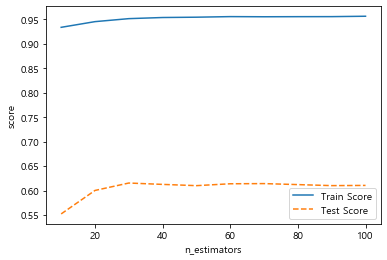

In [79]:
plt.plot(para_n_tree, train_score, linestyle = "-", label = "Train Score")
plt.plot(para_n_tree, test_score, linestyle = "--", label = "Test Score")
plt.ylabel("score"); plt.xlabel("n_estimators")
plt.legend()

In [80]:
train_score = []; test_score = []
para_leaf = [n_leaf*1 for n_leaf in range(1, 21)]

for v_min_samples_leaf in para_leaf:
    rf = RandomForestRegressor(random_state = 1234,
                                n_estimators = 100,
                              min_samples_leaf = v_min_samples_leaf)
    rf.fit(df_train_x, df_train_y)
    train_score.append(rf.score(df_train_x, df_train_y))
    test_score.append(rf.score(df_test_x, df_test_y))

df_score_leaf = pd.DataFrame()
df_score_leaf["MinSamplesLeaf"] = para_leaf
df_score_leaf['TrainScore'] = train_score
df_score_leaf["TestScore"] = test_score
df_score_leaf.round(3)

,MinSamplesLeaf,TrainScore,TestScore
0,1,0.956,0.611
1,2,0.939,0.610
2,3,0.915,0.611
3,4,0.891,0.617
4,5,0.869,0.622
5,6,0.849,0.627
6,7,0.830,0.626
7,8,0.816,0.621
8,9,0.800,0.619
9,10,0.786,0.619


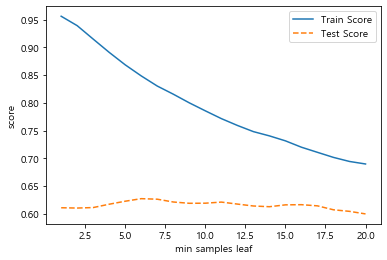

In [81]:
plt.plot(para_leaf, train_score, linestyle = "-", label = "Train Score")
plt.plot(para_leaf, test_score, linestyle = "--", label = "Test Score")
plt.ylabel("score"); plt.xlabel("min samples leaf")
plt.legend()

In [82]:
train_score = []; test_score = []
para_split = [n_split*2for n_split in range(2, 21)]

for v_min_samples_split in para_split:
    rf = RandomForestRegressor(random_state = 1234,
                                n_estimators = 100 ,
                                min_samples_split = v_min_samples_split,
                              min_samples_leaf = 6)
    rf.fit(df_train_x, df_train_y)
    train_score.append(rf.score(df_train_x, df_train_y))
    test_score.append(rf.score(df_test_x, df_test_y))

df_score_split = pd.DataFrame()
df_score_split["MinSampleLeaf"] = para_split
df_score_split['TrainScore'] = train_score
df_score_split["TestScore"] = test_score
df_score_split.round(3)

,MinSampleLeaf,TrainScore,TestScore
0,4,0.849,0.627
1,6,0.849,0.627
2,8,0.849,0.627
3,10,0.849,0.627
4,12,0.849,0.627
5,14,0.839,0.629
6,16,0.831,0.629
7,18,0.821,0.628
8,20,0.813,0.628
9,22,0.803,0.628


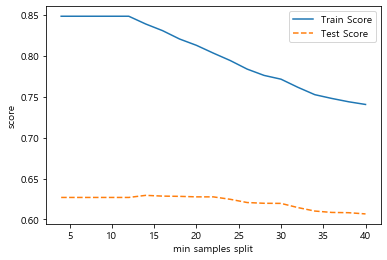

In [83]:
plt.plot(para_split, train_score, linestyle = "-", label = "Train Score")
plt.plot(para_split, test_score, linestyle = "--", label = "Test Score")
plt.ylabel("score"); plt.xlabel("min samples split")
plt.legend()

In [84]:
train_score = []; test_score = []
para_depth = [depth for depth in range(1, 11)]

for v_max_depth in para_depth:
    rf = RandomForestRegressor(random_state = 1234,
                                min_samples_leaf = 6 ,
                                min_samples_split = 14,
                                max_depth = v_max_depth,
                              n_estimators = 100)
    rf.fit(df_train_x, df_train_y)
    train_score.append(rf.score(df_train_x, df_train_y))
    test_score.append(rf.score(df_test_x, df_test_y))

df_score_depth = pd.DataFrame()
df_score_depth["Depth"] = para_depth
df_score_depth['TrainScore'] = train_score
df_score_depth["TestScore"] = test_score
df_score_depth.round(3)

,Depth,TrainScore,TestScore
0,1,0.557,0.448
1,2,0.721,0.598
2,3,0.789,0.620
3,4,0.825,0.627
4,5,0.837,0.631
5,6,0.839,0.629
6,7,0.839,0.629
7,8,0.839,0.629
8,9,0.839,0.629
9,10,0.839,0.629


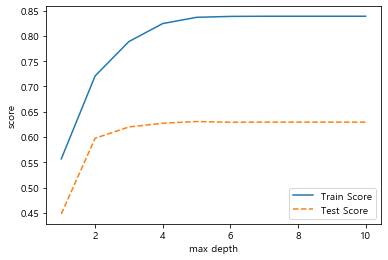

In [86]:
plt.plot(para_depth, train_score, linestyle = "-", label = "Train Score")
plt.plot(para_depth, test_score, linestyle = "--", label = "Test Score")
plt.ylabel("score"); plt.xlabel("max depth")
plt.legend()

In [87]:
rf_final = RandomForestRegressor(min_samples_leaf = 8, min_samples_split = 14, max_depth = 4, random_state = 1234, n_estimators = 100)
rf_final.fit(df_train_x, df_train_y)
print("Scoring on training set: {:.3f}".format(rf_final.score(df_train_x, df_train_y)))
print("Scoring on test set: {:.3f}".format(rf_final.score(df_test_x, df_test_y)))

Scoring on training set: 0.809
Scoring on test set: 0.621


In [88]:
df_importance = pd.DataFrame()
df_importance["Feature"] = v_feature_name
df_importance["Importance"] = rf_final.feature_importances_

df_importance.sort_values("Importance", ascending = False, inplace = True)
df_importance.round(3)

,Feature,Importance
5,ABDOMEN,0.863
4,CHEST,0.031
2,HEIGHT,0.027
0,AGE,0.013
7,THIGH,0.010
12,WRIST,0.010
3,NECK,0.009
8,KNEE,0.009
6,HIP,0.008
1,WEIGHT,0.008


Text(0, 0.5, '변수')

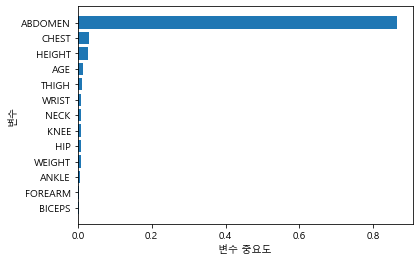

In [89]:
df_importance.sort_values("Importance", ascending = True, inplace = True)
coordinates = range(len(df_importance))
plt.barh(y = coordinates, width = df_importance["Importance"])
plt.yticks(coordinates, df_importance["Feature"])
plt.xlabel("변수 중요도")
plt.ylabel("변수")

In [90]:
estimator = RandomForestRegressor()
param_grid = {"max_depth": para_depth, "min_samples_split": para_split, "min_samples_leaf": para_leaf}

grid_dt = GridSearchCV(estimator, param_grid, scoring = "r2", n_jobs = -1)
grid_dt.fit(df_train_x, df_train_y)

print("best estimator model: \n{}".format(grid_dt.best_estimator_))
print("\nbest parameter: \n{}".format(grid_dt.best_params_))
print("\nbest score: \n{}".format(grid_dt.best_score_.round(3)))

best estimator model: 
RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=7, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=12, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

best parameter: 
{'max_depth': 7, 'min_samples_leaf': 1, 'min_samples_split': 12}

best score: 
0.682
